In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-01.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-03.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-02.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.stattools import jarque_bera


In [6]:
# Use correct Kaggle dataset path
df = pd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv')
print(df.shape)
print(df.head())


(12748986, 19)
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111           1   
1           3.30        -74.001648        40.724243           1   
2           1.80        -73.963341        40.802788           1   
3           0.50        -74.009087        40.713818           1   
4           3.00        -73.971176        40.762428           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.974785         40.75061

In [7]:
print(df.isnull().sum())

# Optionally handle NAs
df = df.dropna(subset=['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra'])
print(df.isnull().sum())


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    3
total_amount             0
dtype: int64
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_sur

In [8]:
columns = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']

summary = {}
for col in columns:
    summary[col] = {
        'mean': df[col].mean(),
        'median': df[col].median(),
        'mode': df[col].mode()[0] if not df[col].mode().empty else np.nan,
        'min': df[col].min(),
        'max': df[col].max(),
        'std': df[col].std(),
        'variance': df[col].var(),
        'skewness': df[col].skew(),
        'kurtosis': df[col].kurt(),
        'count': df[col].count(),
        'missing': df[col].isnull().sum()
    }

stats_df = pd.DataFrame(summary)
print(stats_df)


          passenger_count  trip_distance   fare_amount  total_amount  \
mean         1.681491e+00   1.345913e+01  1.190566e+01  1.510829e+01   
median       1.000000e+00   1.680000e+00  9.000000e+00  1.116000e+01   
mode         1.000000e+00   9.000000e-01  6.000000e+00  6.800000e+00   
min          0.000000e+00   0.000000e+00 -4.500000e+02 -4.503000e+02   
max          9.000000e+00   1.542000e+07  4.008000e+03  3.950612e+06   
std          1.337924e+00   9.844094e+03  1.030254e+01  1.106503e+03   
variance     1.790039e+00   9.690619e+07  1.061423e+02  1.224349e+06   
skewness     2.085022e+00   1.148771e+03  1.261540e+01  3.569886e+03   
kurtosis     3.210114e+00   1.429174e+06  2.555205e+03  1.274572e+07   
count        1.274899e+07   1.274899e+07  1.274899e+07  1.274899e+07   
missing      0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   

            tip_amount         extra  
mean      1.853814e+00  3.082790e-01  
median    1.000000e+00  0.000000e+00  
mode      0.000000

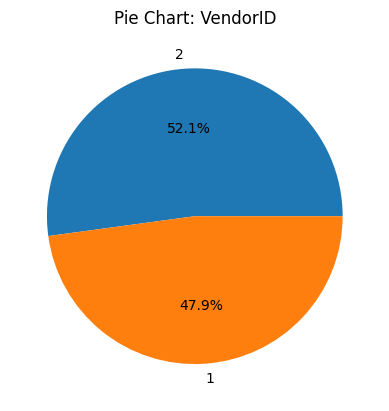

In [9]:
pie_col = 'VendorID'  # change to actual column if needed
df[pie_col].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f'Pie Chart: {pie_col}')
plt.ylabel('')
plt.show()


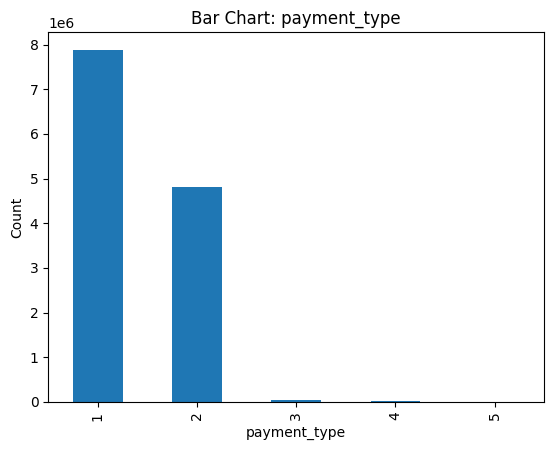

KeyError: 'RatecodeID'

In [10]:
categorical = ['payment_type', 'RatecodeID']  # modify as per actual column names
for col in categorical:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart: {col}')
    plt.ylabel('Count')
    plt.show()


In [ ]:
for col in columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(y=df[col], ax=axes[0])
    axes[0].set_title(f'Boxplot: {col}')
    sns.violinplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Violin Plot: {col}')
    plt.show()


In [11]:
# Pearson
pearson1 = df['trip_distance'].corr(df['fare_amount'], method='pearson')
pearson2 = df['fare_amount'].corr(df['tip_amount'], method='pearson')

# Spearman
spearman1 = df['trip_distance'].corr(df['fare_amount'], method='spearman')
spearman2 = df['fare_amount'].corr(df['tip_amount'], method='spearman')

print('Pearson trip_distance vs fare_amount:', pearson1)
print('Pearson fare_amount vs tip_amount:', pearson2)
print('Spearman trip_distance vs fare_amount:', spearman1)
print('Spearman fare_amount vs tip_amount:', spearman2)


Pearson trip_distance vs fare_amount: 0.00044221179558368056
Pearson fare_amount vs tip_amount: 0.0013981626102069376
Spearman trip_distance vs fare_amount: 0.9338084154430518
Spearman fare_amount vs tip_amount: 0.3675257774739462


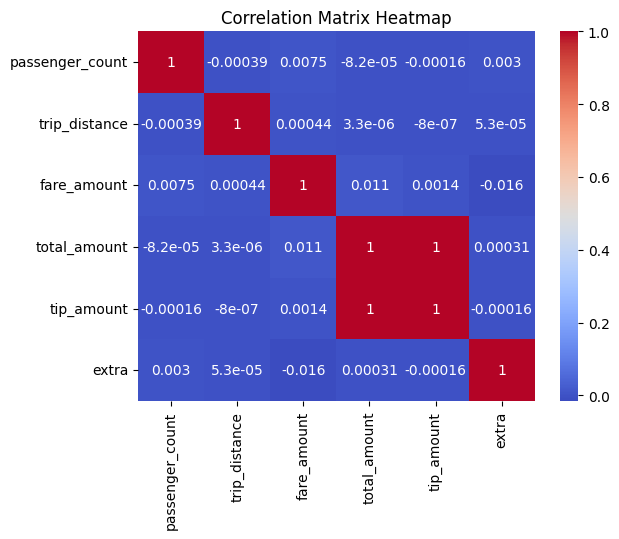

In [12]:
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


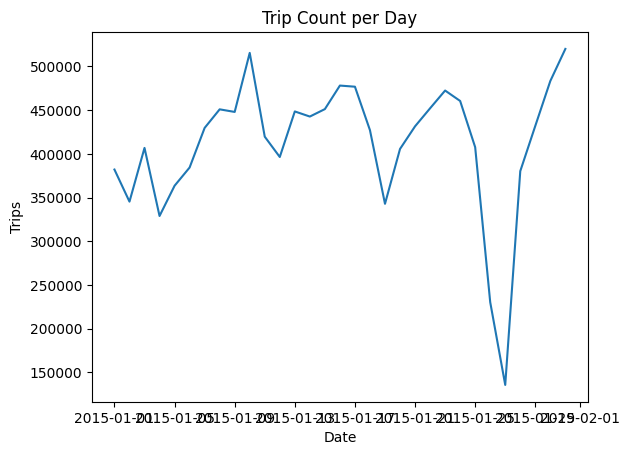

In [13]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['date'] = df['tpep_pickup_datetime'].dt.date
trips_per_day = df.groupby('date').size()
trips_per_day.plot()
plt.title('Trip Count per Day')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.show()


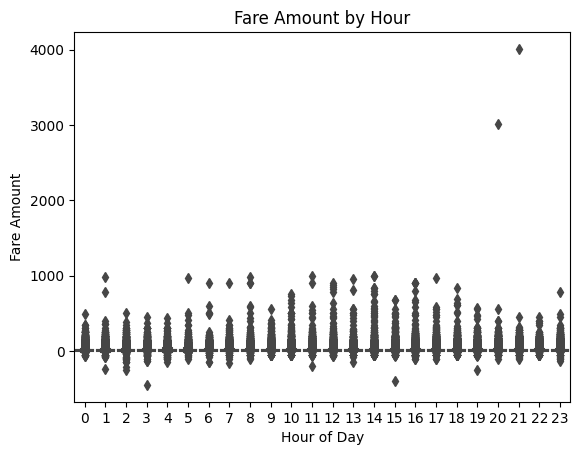

In [14]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title('Fare Amount by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fare Amount')
plt.show()


In [15]:
# Save statistical summary if needed
stats_df.to_csv('descriptive_statistics_summary.csv')


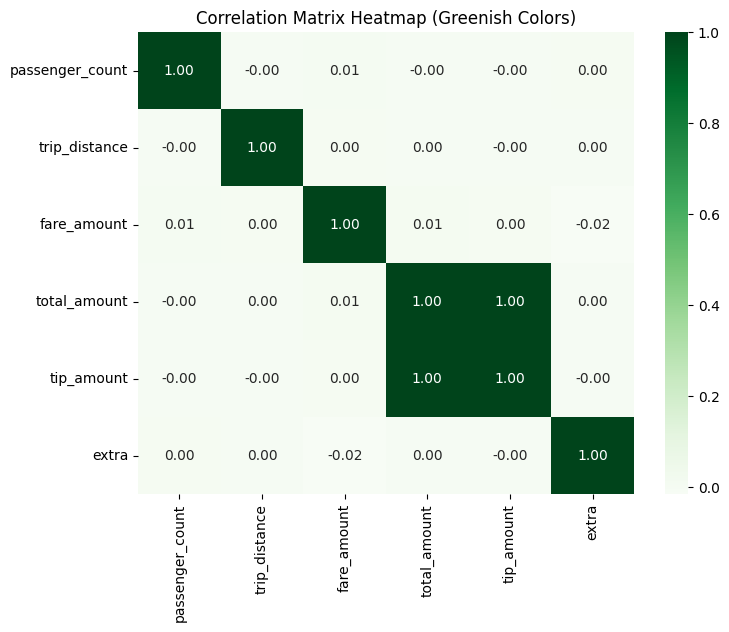

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# If you have already built your correlation matrix:
# corr_matrix = df[['passenger_count','trip_distance','fare_amount','total_amount','tip_amount','extra']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df[columns].corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Greenish Colors)')
plt.show()
